Image exists: True
Mask exists: True


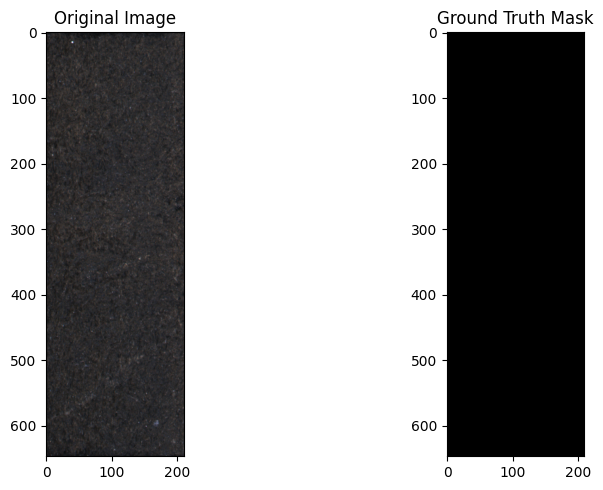

In [14]:
import matplotlib.pyplot as plt
import cv2
import os

# Paths to raw (unprocessed) dataset
img_path = '/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/raw/KolektorSDD/KolektorSDD2/test/20024.png'
mask_path = '/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/raw/KolektorSDD/KolektorSDD2/test/20024_GT.png'

# Check existence
print("Image exists:", os.path.exists(img_path))
print("Mask exists:", os.path.exists(mask_path))

# Load image and mask
img = cv2.imread(img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError(f"Image not found or unreadable: {img_path}")
if mask is None:
    raise ValueError(f"Mask not found or unreadable: {mask_path}")

# Display image and mask side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Ground Truth Mask")

plt.tight_layout()
plt.show()


Check if Data is ready for Training

In [16]:
from pathlib import Path

def verify_yolo_dataset(data_dir):
    data_dir = Path(data_dir)
    img_train = list((data_dir / "images/train").glob("*.png"))
    img_val = list((data_dir / "images/val").glob("*.png"))
    lbl_train = list((data_dir / "labels/train").glob("*.txt"))
    lbl_val = list((data_dir / "labels/val").glob("*.txt"))

    empty_train = sum(1 for f in lbl_train if f.stat().st_size == 0)
    empty_val = sum(1 for f in lbl_val if f.stat().st_size == 0)
    non_empty_train = len(lbl_train) - empty_train
    non_empty_val = len(lbl_val) - empty_val

    print(f"Dataset: {data_dir.name}")
    print(f"Train images: {len(img_train)} | Val images: {len(img_val)}")
    print(f"Train labels → Empty: {empty_train}, Non-empty: {non_empty_train}")
    print(f"Val labels   → Empty: {empty_val}, Non-empty: {non_empty_val}")

    if non_empty_train + non_empty_val == 0:
        print("No bounding boxes found. Check your preprocessing.")
    else:
        print("Dataset ready for YOLO training.")

verify_yolo_dataset("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD")


Dataset: KolektorSDD
Train images: 2333 | Val images: 1004
Train labels → Empty: 2087, Non-empty: 246
Val labels   → Empty: 894, Non-empty: 110
Dataset ready for YOLO training.


: 

### Classes in MVTEC_AD dataset

In [2]:
from pathlib import Path

root = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/raw/MVTEC_AD/mvtec_anomaly_detection")
classes = set()
for category in root.iterdir():
    if not category.is_dir():
        continue
    test_dir = category / "test"
    if test_dir.exists():
        for defect_type in test_dir.iterdir():
            if defect_type.is_dir() and defect_type.name != "good":
                classes.add(defect_type.name)

print(f"Total defect classes: {len(classes)}")
print(sorted(classes))


Total defect classes: 48
['bent', 'bent_lead', 'bent_wire', 'broken', 'broken_large', 'broken_small', 'broken_teeth', 'cable_swap', 'color', 'combined', 'contamination', 'crack', 'cut', 'cut_inner_insulation', 'cut_lead', 'cut_outer_insulation', 'damaged_case', 'defective', 'fabric_border', 'fabric_interior', 'faulty_imprint', 'flip', 'fold', 'glue', 'glue_strip', 'gray_stroke', 'hole', 'liquid', 'manipulated_front', 'metal_contamination', 'misplaced', 'missing_cable', 'missing_wire', 'oil', 'pill_type', 'poke', 'poke_insulation', 'print', 'rough', 'scratch', 'scratch_head', 'scratch_neck', 'split_teeth', 'squeeze', 'squeezed_teeth', 'thread', 'thread_side', 'thread_top']


# Koklektor Dataset

In [3]:
from pathlib import Path

root = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/raw/KolektorSDD/KolektorSDD2")
train_dir = root / "train"
test_dir = root / "test"

def count_defects(folder):
    defects = 0
    total = 0
    for img in folder.glob("*.png"):
        if img.name.endswith("_GT.png"):
            continue
        total += 1
        mask = folder / f"{img.stem}_GT.png"
        if mask.exists():
            defects += 1
    return total, defects

train_total, train_defects = count_defects(train_dir)
test_total, test_defects = count_defects(test_dir)

print(f"TRAIN: {train_defects}/{train_total} defective")
print(f"TEST: {test_defects}/{test_total} defective")


TRAIN: 2331/2333 defective
TEST: 1004/1004 defective


### Combined Dataset

In [4]:
# from pathlib import Path

# root = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/combined")
# train_imgs = list((root / "images/train").glob("*.png"))
# train_lbls = list((root / "labels/train").glob("*.txt"))

# print(f"Train images: {len(train_imgs)} | Labels: {len(train_lbls)}")
# missing = [img.stem for img in train_imgs if not (root / "labels/train" / f"{img.stem}.txt").exists()]
# print(f"Missing labels: {len(missing)}")


Train images: 5962 | Labels: 5962
Missing labels: 0


## Check label contents

In [ ]:
# import random

# label_path = random.choice(list((root / "labels/train").glob("*.txt")))
# print(label_path)
# print(label_path.read_text().strip().split('\n')[:5])


/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/combined/labels/train/cable_191.txt
['']


## Checking number of classes

In [7]:
# classes = set()
# for lbl in (root / "labels/train").glob("*.txt"):
#     with open(lbl) as f:
#         for line in f:
#             if line.strip():
#                 cid = int(line.split()[0])
#                 classes.add(cid)
# print(f"Classes found: {len(classes)} -> {sorted(classes)}")

Classes found: 1 -> [0]


## Check label files

In [8]:
# import os

# labels_dir = "/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/combined/labels/train"
# empty_files = []
# for file in os.listdir(labels_dir):
#     path = os.path.join(labels_dir, file)
#     if os.path.getsize(path) == 0:
#         empty_files.append(file)

# print(f"Empty label files: {len(empty_files)}")
# print(empty_files[:10])  # show a few


Empty label files: 5716
['11303.txt', 'pill_063.txt', 'wood_056.txt', 'capsule_032.txt', 'screw_072.txt', '11465.txt', 'zipper_028.txt', '11471.txt', '12178.txt', 'wood_042.txt']


***Sanity check for both datasets after preprocessing***


=== DATASET: MVTEC_AD ===
TRAIN — Images: 3629, Labels: 3629, Missing labels: 0
VAL — Images: 1725, Labels: 1725, Missing labels: 0
Class Distribution (VAL): {24: 18, 10: 45, 4: 20, 26: 68, 42: 18, 28: 26, 45: 81, 25: 16, 14: 11, 23: 37, 38: 42, 3: 34, 18: 31, 8: 162, 32: 12, 41: 29, 9: 189, 2: 18, 39: 151, 37: 62, 40: 24, 36: 19, 35: 40, 11: 92, 21: 23, 12: 61, 19: 24, 47: 23, 20: 42, 31: 12, 30: 10, 34: 9, 46: 32, 0: 71, 29: 45, 44: 17, 7: 12, 15: 16, 17: 68, 27: 21, 43: 20, 5: 26, 6: 27, 16: 12, 33: 18, 22: 17, 1: 11, 13: 20}

Visualizing random validation samples...


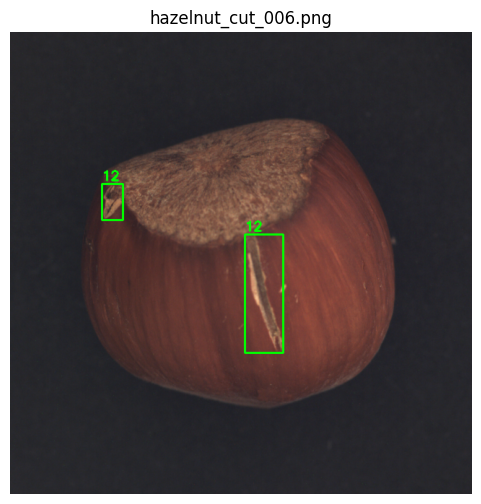

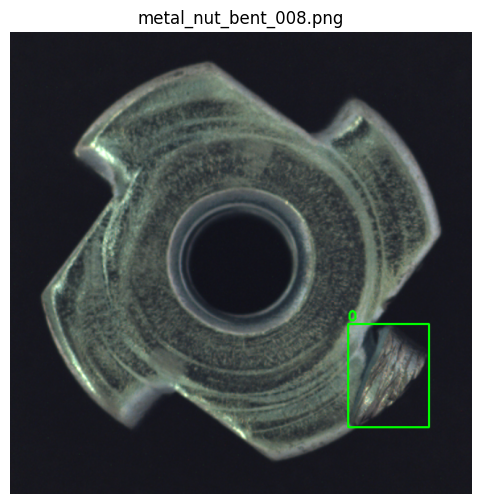

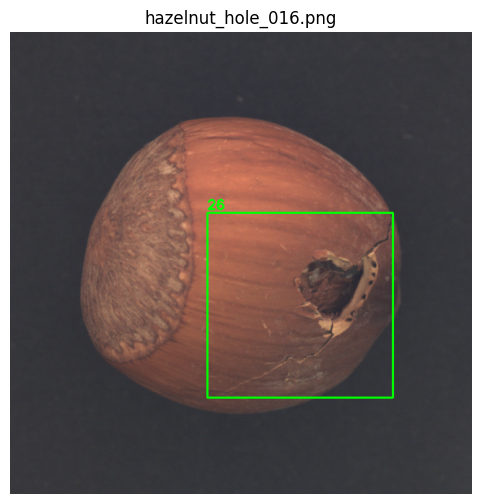


=== DATASET: KolektorSDD ===
TRAIN — Images: 2333, Labels: 2333, Missing labels: 0
VAL — Images: 1004, Labels: 1004, Missing labels: 0
Class Distribution (VAL): {0: 119}

Visualizing random validation samples...


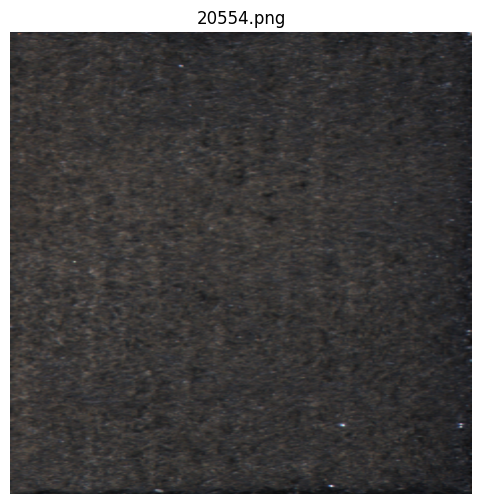

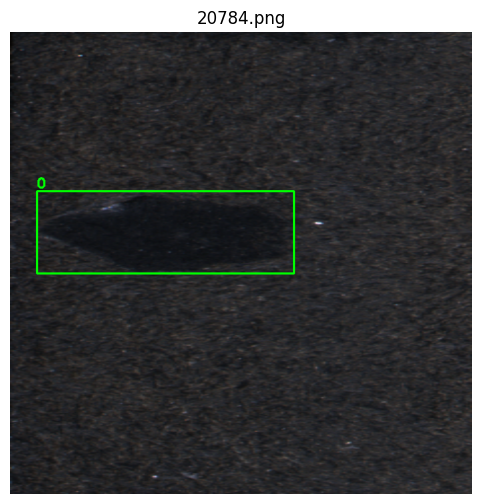

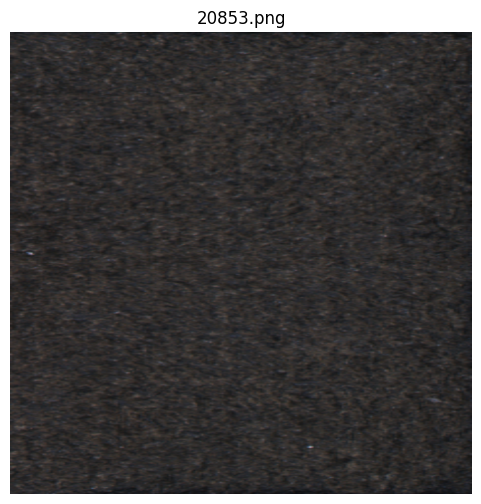

In [10]:
import os
import random
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import Counter

DATA_ROOT = Path("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed")
DATASETS = ["MVTEC_AD", "KolektorSDD"]

def count_files(dataset_path):
    """Count images and labels per split."""
    stats = {}
    for split in ['train', 'val']:
        img_dir = dataset_path / f"images/{split}"
        lbl_dir = dataset_path / f"labels/{split}"

        imgs = list(img_dir.glob("*.png"))
        lbls = list(lbl_dir.glob("*.txt"))

        stats[split] = {
            "images": len(imgs),
            "labels": len(lbls),
            "missing_labels": len([i for i in imgs if not (lbl_dir / (i.stem + ".txt")).exists()])
        }
    return stats


def parse_label_file(label_path):
    """Read YOLO label and return class ids."""
    if not label_path.exists():
        return []
    with open(label_path) as f:
        lines = f.readlines()
    return [int(line.split()[0]) for line in lines if line.strip()]


def class_distribution(lbl_dir):
    """Get frequency of classes in label directory."""
    class_ids = []
    for txt in lbl_dir.glob("*.txt"):
        class_ids += parse_label_file(txt)
    return dict(Counter(class_ids))


def visualize_random_sample(dataset_path, split="val", num_samples=3):
    """Visualize random images with YOLO boxes."""
    img_dir = dataset_path / f"images/{split}"
    lbl_dir = dataset_path / f"labels/{split}"
    imgs = list(img_dir.glob("*.png"))
    if not imgs:
        print(f"No images found in {img_dir}")
        return

    samples = random.sample(imgs, min(num_samples, len(imgs)))

    for img_path in samples:
        image = cv2.imread(str(img_path))
        h, w = image.shape[:2]
        label_path = lbl_dir / f"{img_path.stem}.txt"

        if label_path.exists():
            with open(label_path) as f:
                for line in f:
                    c, x, y, bw, bh = map(float, line.split())
                    x1, y1 = int((x - bw/2)*w), int((y - bh/2)*h)
                    x2, y2 = int((x + bw/2)*w), int((y + bh/2)*h)
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
                    cv2.putText(image, str(int(c)), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

        plt.figure(figsize=(6,6))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"{img_path.name}")
        plt.axis("off")
        plt.show()

for dataset_name in DATASETS:
    print(f"\n=== DATASET: {dataset_name} ===")
    dataset_path = DATA_ROOT / dataset_name
    stats = count_files(dataset_path)

    for split, s in stats.items():
        print(f"{split.upper()} — Images: {s['images']}, Labels: {s['labels']}, Missing labels: {s['missing_labels']}")

    print("Class Distribution (VAL):", class_distribution(dataset_path / "labels/val"))

    print("\nVisualizing random validation samples...")
    visualize_random_sample(dataset_path, split="val", num_samples=3)


## Validate Label Integrity

In [3]:
import glob

def validate_labels(label_dir):
    bad_labels = []
    for file in glob.glob(f"{label_dir}/*.txt"):
        with open(file, 'r') as f:
            for line in f:
                try:
                    vals = list(map(float, line.split()))
                    if not (0 <= vals[1] <= 1 and 0 <= vals[2] <= 1 and 0 < vals[3] <= 1 and 0 < vals[4] <= 1):
                        bad_labels.append(file)
                except:
                    bad_labels.append(file)
    print("Total label files checked:", len(glob.glob(f"{label_dir}/*.txt")))
    print("Corrupt labels:", len(bad_labels))
    return bad_labels

validate_labels("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/labels/train")
validate_labels("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD/labels/train")


Total label files checked: 3629
Corrupt labels: 0
Total label files checked: 2333
Corrupt labels: 0


[]

## Check Class Distribution

In [5]:
from collections import Counter
import pandas as pd

def class_distribution(label_dir):
    counter = Counter()
    for file in glob.glob(f"{label_dir}/*.txt"):
        with open(file, 'r') as f:
            for line in f:
                cls = int(line.split()[0])
                counter[cls] += 1
    df = pd.DataFrame(counter.items(), columns=["Class", "Count"])
    print(df)

class_distribution("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/labels/train")
class_distribution("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD/labels/train")


Empty DataFrame
Columns: [Class, Count]
Index: []
   Class  Count
0      0    273


In [6]:
import glob

def check_class_distribution(label_dir):
    class_counts = {}
    for file in glob.glob(f"{label_dir}/*.txt"):
        with open(file, "r") as f:
            for line in f:
                if line.strip():
                    cls = int(line.split()[0])
                    class_counts[cls] = class_counts.get(cls, 0) + 1
    print(f"Classes found in {label_dir}: {class_counts if class_counts else 'No classes found!'}")

print("=== MVTec AD ===")
check_class_distribution("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTecAD/labels/val")

print("\n=== KolektorSDD ===")
check_class_distribution("/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD/labels/val")


=== MVTec AD ===
Classes found in /Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTecAD/labels/val: No classes found!

=== KolektorSDD ===
Classes found in /Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/KolektorSDD/labels/val: {0: 119}


## Files empty

In [8]:
import os

label_dir = "/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/labels/val"

empty_count = 0
non_empty_count = 0
empty_files = []

for f in os.listdir(label_dir):
    file_path = os.path.join(label_dir, f)
    if os.path.isfile(file_path):
        with open(file_path, "r") as file:
            content = file.read().strip()
            if not content:
                empty_count += 1
                empty_files.append(f)
            else:
                non_empty_count += 1

print(f"Total label files: {len(os.listdir(label_dir))}")
print(f"Empty label files: {empty_count}")
print(f"Non-empty label files: {non_empty_count}")

if empty_files:
    print("\nExample empty files:", empty_files[:10])


Total label files: 1725
Empty label files: 467
Non-empty label files: 1258

Example empty files: ['zipper_good_029.txt', 'zipper_good_001.txt', 'capsule_good_017.txt', 'capsule_good_003.txt', 'zipper_good_015.txt', 'hazelnut_good_013.txt', 'hazelnut_good_007.txt', 'wood_good_008.txt', 'transistor_good_003.txt', 'transistor_good_017.txt']


In [11]:
## train contains good images only so all label files should be empty
import os

label_dir = "/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/labels/train"

empty_count = 0
non_empty_count = 0
empty_files = []

for f in os.listdir(label_dir):
    file_path = os.path.join(label_dir, f)
    if os.path.isfile(file_path):
        with open(file_path, "r") as file:
            content = file.read().strip()
            if not content:
                empty_count += 1
                empty_files.append(f)
            else:
                non_empty_count += 1

print(f"Total label files: {len(os.listdir(label_dir))}")
print(f"Empty label files: {empty_count}")
print(f"Non-empty label files: {non_empty_count}")

if empty_files:
    print("\nExample empty files:", empty_files[:10])


Total label files: 3629
Empty label files: 3629
Non-empty label files: 0

Example empty files: ['pill_063.txt', 'wood_056.txt', 'capsule_032.txt', 'screw_072.txt', 'zipper_028.txt', 'wood_042.txt', 'capsule_026.txt', 'screw_066.txt', 'pill_077.txt', 'zipper_000.txt']


## checking non-empty files

In [10]:
import os

label_dir = "/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/labels/val"

valid_lines = 0
invalid_lines = 0

for f in os.listdir(label_dir):
    with open(os.path.join(label_dir, f), "r") as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                valid_lines += 1
            elif len(parts) > 0:
                invalid_lines += 1

print(f"Valid YOLO entries: {valid_lines}")
print(f"Invalid entries: {invalid_lines}")


Valid YOLO entries: 1882
Invalid entries: 0


In [14]:
# should be empty files as all are good images with no defects in train
import os

label_dir = "/Users/ajayyy/Desktop/Deep_Learning/Smart-Quality-Inspection-System/data/processed/MVTEC_AD/labels/train"

valid_lines = 0
invalid_lines = 0

for f in os.listdir(label_dir):
    with open(os.path.join(label_dir, f), "r") as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                valid_lines += 1
            elif len(parts) > 0:
                invalid_lines += 1

print(f"Valid YOLO entries: {valid_lines}")
print(f"Invalid entries: {invalid_lines}") 


Valid YOLO entries: 0
Invalid entries: 0
